<a href="https://colab.research.google.com/github/karthika-shankar/bank_churnanalysis_tcs/blob/main/randomforestchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [ ]:
df=pd.read_csv("with_sentiment (1).csv")
df

,CustomerID,Name,Age,Gender,Geography,Native_Place,Marital_Status,Tenure,Account_Type,Balance,...,Loan_Status,EMI_Amount,Exited,Branch_Code,Account_Open_Date,Last_Transaction_Date,Customer_Review,Emoji_Sentiment,Text_Sentiment,Combined_Sentiment
0,CID000001,Sunita Sharma,21,Other,Tamil Nadu,Hyderabad,Married,4,Current,676699.49,...,Auto,4238.57,0,BR072,2024-03-10,2024-06-23,Reasonable fees 💲,0.0,0.0000,0.00000
1,CID000002,Amit Kumar,53,Male,Karnataka,Pune,Divorced,8,Premium,215313.76,...,Business,30226.31,0,BR094,2020-02-26,2024-08-20,Professional staff 🌟,1.0,0.0000,0.60000
2,CID000003,Rohan Gupta,55,Other,West Bengal,Lucknow,Married,2,Savings,661263.32,...,Education,43308.58,0,BR021,2024-04-07,2024-11-21,Great mobile app 🥰,1.0,0.9081,0.96324
3,CID000004,Sunita Iyer,27,Other,Karnataka,Jaipur,Married,5,NRI,379455.44,...,Business,19905.26,0,BR028,2022-02-15,2024-12-11,Professional staff 🌟,1.0,0.0000,0.60000
4,CID000005,Priya Iyer,76,Male,Tamil Nadu,Bangalore,Married,17,Senior Citizen,747013.81,...,Multiple,27711.22,0,BR015,2021-11-16,2024-07-04,Professional staff 🌟,1.0,0.0000,0.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CID099996,Rohan Gupta,44,Male,Telangana,Chennai,Widowed,14,Joint,678326.81,...,Gold,0.00,0,BR081,2025-03-12,2024-08-31,Great mobile app 🥰,1.0,0.9081,0.96324
99996,CID099997,Amit Singh,62,Male,West Bengal,Bangalore,Widowed,13,Current,836294.17,...,Auto,9337.87,0,BR086,2016-03-02,2024-11-04,Excellent service! 😊,1.0,0.8748,0.94992
99997,CID099998,Sunita Rao,59,Female,Karnataka,Lucknow,Divorced,3,NRI,537264.63,...,Gold,10962.54,0,BR062,2023-04-21,2024-10-17,Great mobile app 🥰,1.0,0.9081,0.96324
99998,CID099999,Neha Gupta,50,Male,Telangana,Pune,Divorced,4,Salary,386295.37,...,Multiple,83598.98,0,BR019,2022-08-07,2024-12-06,No waiting time ⚡,1.0,-0.2960,0.48160


In [ ]:
branch_churn_rate = df.groupby('Branch_Code')['Exited'].mean()
df['Branch_Churn_Rate'] = df['Branch_Code'].map(branch_churn_rate)

X=df.drop(columns=['Exited', 'Customer_Review','CustomerID','Name','Emoji_Sentiment','Text_Sentiment','Branch_Code','Account_Open_Date','Last_Transaction_Date'])
Y=df['Exited']

In [ ]:
branch_churn_rate

,Exited
Branch_Code,
BR001,0.300106
BR002,0.306122
BR003,0.290188
BR004,0.288363
BR005,0.288423
...,...
BR096,0.285581
BR097,0.307773
BR098,0.319960


In [ ]:
X

,Age,Gender,Geography,Native_Place,Marital_Status,Tenure,Account_Type,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Monthly_Income,CreditScore,Loan_Status,EMI_Amount,Combined_Sentiment,Branch_Churn_Rate
0,21,Other,Tamil Nadu,Hyderabad,Married,4,Current,676699.49,1,1,0,253634.99,21136.25,523,Auto,4238.57,0.00000,0.306082
1,53,Male,Karnataka,Pune,Divorced,8,Premium,215313.76,3,0,0,883869.14,73655.76,667,Business,30226.31,0.60000,0.308219
2,55,Other,West Bengal,Lucknow,Married,2,Savings,661263.32,3,0,0,1759670.60,146639.22,689,Education,43308.58,0.96324,0.300000
3,27,Other,Karnataka,Jaipur,Married,5,NRI,379455.44,2,1,0,612286.53,51023.88,332,Business,19905.26,0.60000,0.290355
4,76,Male,Tamil Nadu,Bangalore,Married,17,Senior Citizen,747013.81,4,1,1,594777.37,49564.78,441,Multiple,27711.22,0.60000,0.287755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,44,Male,Telangana,Chennai,Widowed,14,Joint,678326.81,1,1,1,587557.65,48963.14,530,Gold,0.00,0.96324,0.287562
99996,62,Male,West Bengal,Bangalore,Widowed,13,Current,836294.17,3,0,1,495476.53,41289.71,864,Auto,9337.87,0.94992,0.298087
99997,59,Female,Karnataka,Lucknow,Divorced,3,NRI,537264.63,4,0,0,745453.68,62121.14,486,Gold,10962.54,0.96324,0.301370
99998,50,Male,Telangana,Pune,Divorced,4,Salary,386295.37,4,0,1,1785996.13,148833.01,512,Multiple,83598.98,0.48160,0.271134


In [ ]:
categorical=[i for i in X.columns if X[i].dtypes=='O']
numerical=[i for i in X.columns if X[i].dtypes!='O']

In [ ]:
categorical

['Gender',
 'Geography',
 'Native_Place',
 'Marital_Status',
 'Account_Type',
 'Loan_Status']

In [ ]:
enc=OneHotEncoder(drop='first')
enc.fit(X[categorical])

OneHotEncoder(drop='first')

In [ ]:
categorical2=enc.get_feature_names_out(categorical)
en_X_categorical=pd.DataFrame(enc.transform(X[categorical]).toarray(), columns=categorical2)

In [ ]:
X_encoded=pd.concat([en_X_categorical, X[numerical]], axis=1)
feature_names=X_encoded.columns

In [ ]:
feature_names

Index(['Gender_Male', 'Gender_Other', 'Geography_Gujarat',
       'Geography_Karnataka', 'Geography_Maharashtra', 'Geography_Rajasthan',
       'Geography_Tamil Nadu', 'Geography_Telangana',
       'Geography_Uttar Pradesh', 'Geography_West Bengal',
       'Native_Place_Bangalore', 'Native_Place_Chennai', 'Native_Place_Delhi',
       'Native_Place_Hyderabad', 'Native_Place_Jaipur', 'Native_Place_Kolkata',
       'Native_Place_Lucknow', 'Native_Place_Mumbai', 'Native_Place_Pune',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widowed', 'Account_Type_Joint', 'Account_Type_NRI',
       'Account_Type_Premium', 'Account_Type_Salary', 'Account_Type_Savings',
       'Account_Type_Senior Citizen', 'Account_Type_Student',
       'Loan_Status_Business', 'Loan_Status_Education', 'Loan_Status_Gold',
       'Loan_Status_Home', 'Loan_Status_Multiple', 'Loan_Status_Personal',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'E

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape,
X_test.shape,
Y_train.shape,
Y_test.shape)

(70000, 47) (30000, 47) (70000,) (30000,)


In [ ]:
rfc=RandomForestClassifier(n_estimators=1000, random_state=0)     #10=88.04  100=~89
rfc.fit(X_train, Y_train)          #1000 trees is a mistake. it's taking toooooo much time uuuughhhhhh
Y_pred=rfc.predict(X_test)

In [ ]:
print('Model accuracy:{0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

Model accuracy:0.8957


In [ ]:
Y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
#help(RandomForestClassifier)
feature_importance=pd.DataFrame(rfc.feature_importances_, index=feature_names).sort_values(0,ascending=False)
feature_importance

,0
Combined_Sentiment,0.288666
IsActiveMember,0.188795
EMI_Amount,0.066327
Age,0.045845
EstimatedSalary,0.038938
Monthly_Income,0.038811
Balance,0.037634
CreditScore,0.035849
Branch_Churn_Rate,0.033422
Loan_Status_Multiple,0.030763


<Axes: title={'center': 'Feature Importance'}>

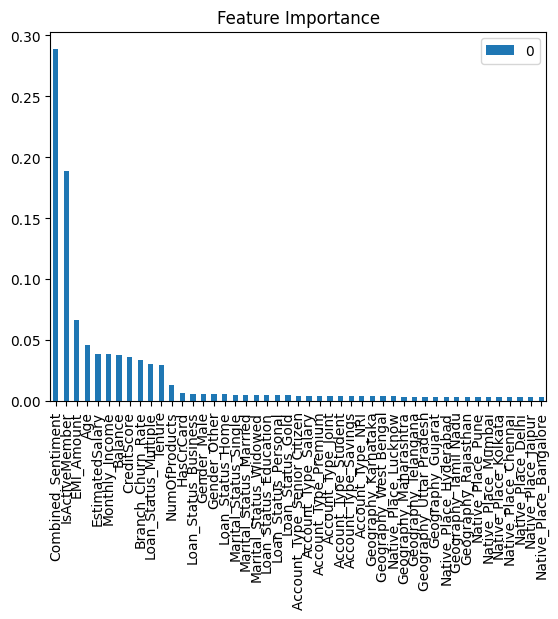

In [ ]:
feature_importance.plot(kind='bar', title='Feature Importance')
